In [1]:
import json
from pathlib import Path
import pandas as pd

path = Path("Data\playerank.json")  # adjust if needed

with path.open("r", encoding="utf-8") as f:
    data_player_rank = json.load(f)   # Python list[dict]

# Convert to DataFrame
df_player_rank = pd.DataFrame(data_player_rank)

# Peek at first rows
print(type(df_player_rank), df_player_rank.shape)
display(df_player_rank.head())  # if Jupyter; otherwise print(df_player_rank.head())


<class 'pandas.core.frame.DataFrame'> (46897, 6)


,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90


In [2]:
# Load players.json → flattened pandas DataFrame named df_players
import json
import pandas as pd
from pathlib import Path
from pandas import json_normalize

# 1) Find the file
candidates = [
    Path("players.json"),
    Path("Data") / "players.json",
    Path("data") / "players.json",
    Path("../Data") / "players.json",
]
path = next((p for p in candidates if p.exists()), None)

# 2) Read JSON (fallback to JSONL if needed)
if path is None:
    raise FileNotFoundError(
        "players.json not found. Place it under ./Data/ or update the path list."
    )

try:
    with path.open("r", encoding="utf-8") as f:
        records = json.load(f)  # list[dict]
except json.JSONDecodeError:
    with path.open("r", encoding="utf-8") as f:
        records = [json.loads(line) for line in f if line.strip()]

# 3) Flatten nested dicts (passportArea, birthArea, role, etc.)
df_players = json_normalize(records, sep=".")

# 4) Basic cleaning: turn string "null" into NA, nicer column names, dtypes
df_players = df_players.replace({"null": pd.NA})
df_players.columns = [c.replace(".", "_") for c in df_players.columns]

# Best-effort numeric conversions
num_cols = [
    "wyId", "currentTeamId", "currentNationalTeamId",
    "height", "weight",
    "passportArea_id", "birthArea_id"
]
for c in num_cols:
    if c in df_players.columns:
        df_players[c] = pd.to_numeric(df_players[c], errors="coerce").astype("Int64")

# 5) Show the table (first 20 rows)
display(df_players.head(20))
print("df_players shape:", df_players.shape)


,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,...,792,TUR,TR,GK,GKP,Goalkeeper,Turkey,792,TUR,TR
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,...,686,SEN,SN,DF,DEF,Defender,France,250,FRA,FR
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,...,250,FRA,FR,GK,GKP,Goalkeeper,France,250,FRA,FR
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,...,686,SEN,SN,MD,MID,Midfielder,France,250,FRA,FR
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,...,250,FRA,FR,DF,DEF,Defender,France,250,FRA,FR
5,83,Jasper,,Cillessen,676,1989-04-22,185,33,right,J. Cillessen,...,528,NLD,NL,GK,GKP,Goalkeeper,Netherlands,528,NLD,NL
6,91,Toby,,Alderweireld,1624,1989-03-02,187,36,right,T. Alderweireld,...,56,BEL,BE,DF,DEF,Defender,Belgium,56,BEL,BE
7,88,Jan,,Vertonghen,1624,1987-04-24,189,48,left,J. Vertonghen,...,56,BEL,BE,DF,DEF,Defender,Belgium,56,BEL,BE
8,74,Alexander,,Djiku,3783,1994-08-09,182,229427,right,A. Djiku,...,250,FRA,FR,DF,DEF,Defender,France,250,FRA,FR
9,76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,54,right,C. Eriksen,...,208,DNK,DK,MD,MID,Midfielder,Denmark,208,DNK,DK


df_players shape: (3603, 22)


In [3]:
# Load coaches.json → flattened pandas DataFrame named df_coaches
import json
import pandas as pd
from pathlib import Path
from pandas import json_normalize

# 1) Localizar o ficheiro (ajusta/ordena as opções como preferires)
candidates = [
    Path("coaches.json"),
    Path("Data") / "coaches.json",
    Path("data") / "coaches.json",
    Path("../Data") / "coaches.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError(
        "coaches.json not found. Coloca-o em ./Data/ ou atualiza a lista 'candidates'."
    )

# 2) Ler JSON (com fallback para JSON Lines)
try:
    with path.open("r", encoding="utf-8") as f:
        records = json.load(f)  # list[dict]
except json.JSONDecodeError:
    with path.open("r", encoding="utf-8") as f:
        records = [json.loads(line) for line in f if line.strip()]

# 3) Flatten dos campos aninhados (birthArea, passportArea, etc.)
df_coaches = json_normalize(records, sep=".")

# 4) Limpezas rápidas: "null" → NA; pontos → underscores; tipos numéricos
df_coaches = df_coaches.replace({"null": pd.NA})
df_coaches.columns = [c.replace(".", "_") for c in df_coaches.columns]

num_cols = [
    "wyId", "currentTeamId",
    "birthArea_id", "passportArea_id"
]
for c in num_cols:
    if c in df_coaches.columns:
        df_coaches[c] = pd.to_numeric(df_coaches[c], errors="coerce").astype("Int64")

# 5) Mostrar a tabela (primeiras linhas) e a dimensão
display(df_coaches.head(20))
print("df_coaches shape:", df_coaches.shape)


,wyId,shortName,firstName,middleName,lastName,birthDate,currentTeamId,birthArea_id,birthArea_alpha2code,birthArea_alpha3code,birthArea_name,passportArea_id,passportArea_alpha2code,passportArea_alpha3code,passportArea_name
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,0,76,BR,BRA,Brazil,76,BR,BRA,Brazil
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,0,276,DE,DEU,Germany,276,DE,DEU,Germany
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,0,380,IT,ITA,Italy,380,IT,ITA,Italy
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,674,724,ES,ESP,Spain,724,ES,ESP,Spain
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,0,276,DE,DEU,Germany,792,TR,TUR,Turkey
5,92894,Ernesto Valverde,Ernesto,,Valverde Tejedor,1964-02-09,676,724,ES,ESP,Spain,724,ES,ESP,Spain
6,3880,Unzué,Juan Carlos,,Unzué Labiano,1967-04-22,0,724,ES,ESP,Spain,724,ES,ESP,Spain
7,17121,D. Schuster,Dirk,,Schuster,1967-12-29,0,276,DE,DEU,Germany,276,DE,DEU,Germany
8,20454,A. Conte,Antonio,,Conte,1969-07-31,0,380,IT,ITA,Italy,380,IT,ITA,Italy
9,86604,R. Gareca,Ricardo Alberto,,Gareca Nardi,1958-02-10,0,32,AR,ARG,Argentina,32,AR,ARG,Argentina


df_coaches shape: (208, 15)


In [4]:
# Load referees.json → robust parse → flattened DataFrame named df_referees
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# ---------- 1) Locate the file ----------
candidates = [
    Path("referees.json"),
    Path("Data") / "referees.json",
    Path("data") / "referees.json",
    Path("../Data") / "referees.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("referees.json not found. Put it under ./Data/ or adjust `candidates`.")

# ---------- 2) Read raw text ----------
raw = path.read_text(encoding="utf-8").strip()

# ---------- 3) Try clean load; if it fails, fall back to a tolerant parser ----------
def try_json_load(text):
    try:
        return json.loads(text)
    except json.JSONDecodeError:
        return None

records = try_json_load(raw)

if records is None:
    # Minimal sanitization: fix repeated commas, trailing commas before } or ]
    cleaned = raw
    cleaned = re.sub(r",\s*,+", ", ", cleaned)                # collapse ", ,"
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)          # remove trailing commas before } or ]
    cleaned = cleaned.replace("\n", " ").replace("\r", " ")
    records = try_json_load(cleaned)

if records is None:
    # Last resort: parse object-by-object (tolerant). We scan for top-level JSON objects and parse each.
    objs, errs = [], []
    brace = 0
    start = None
    for i, ch in enumerate(raw):
        if ch == "{":
            if brace == 0:
                start = i
            brace += 1
        elif ch == "}":
            brace -= 1
            if brace == 0 and start is not None:
                chunk = raw[start:i+1]
                # Apply the same small fixes per object
                chunk_fixed = re.sub(r",\s*,+", ", ", chunk)
                chunk_fixed = re.sub(r",\s*([}\]])", r"\1", chunk_fixed)
                try:
                    objs.append(json.loads(chunk_fixed))
                except Exception as e:
                    errs.append({"span": f"{start}-{i}", "error": str(e), "snippet": chunk[:120] + ("..." if len(chunk) > 120 else "")})
                start = None
    records = objs
    errors_df = pd.DataFrame(errs)
else:
    errors_df = pd.DataFrame(columns=["span","error","snippet"])

# ---------- 4) Build DataFrame(s) ----------
# Raw (non-flattened) for quick peek if you want it:
df_raw_referees = pd.DataFrame(records).replace({"null": pd.NA})

# Flatten nested dicts (birthArea, passportArea)
df_referees = json_normalize(records, sep=".").replace({"null": pd.NA})
df_referees.columns = [c.replace(".", "_") for c in df_referees.columns]

# ---------- 5) Light type fixes ----------
for col in ["wyId", "birthArea_id", "passportArea_id"]:
    if col in df_referees.columns:
        df_referees[col] = pd.to_numeric(df_referees[col], errors="coerce").astype("Int64")

# Dates stay as strings/NA; convert if you like:
if "birthDate" in df_referees.columns:
    df_referees["birthDate"] = pd.to_datetime(df_referees["birthDate"], errors="coerce")

# ---------- 6) Display tables ----------
print("df_referees shape:", df_referees.shape)
display(df_referees.head(20))



df_referees shape: (626, 14)


,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea_id,birthArea_alpha2code,birthArea_alpha3code,birthArea_name,passportArea_id,passportArea_alpha2code,passportArea_alpha3code,passportArea_name
0,378217,A. Guzmán,Alexander,,Guzmán Bonilla,NaT,170,CO,COL,Colombia,170,CO,COL,Colombia
1,385011,S. Bennett,Simon,,Bennett,NaT,826,EN,XEN,England,826,EN,XEN,England
2,385544,H. Osmers,Harm,,Osmers,1985-01-28,276,DE,DEU,Germany,276,DE,DEU,Germany
3,383894,F. Assmuth,Frederick,,Assmuth,1977-12-20,276,DE,DEU,Germany,276,DE,DEU,Germany
4,385800,F. Hebrard,Frédéric,,Hebrard,NaT,250,FR,FRA,France,250,FR,FRA,France
5,385015,Javier Aguilar,Javier,,Aguilar Rodríguez,NaT,724,ES,ESP,Spain,724,ES,ESP,Spain
6,395082,Víctor Pérez,Víctor,,Pérez Peraza,1984-12-28,724,ES,ESP,Spain,724,ES,ESP,Spain
7,395056,Alfonso Álvarez,Alfonso,,Álvarez Izquierdo,1972-09-12,724,ES,ESP,Spain,724,ES,ESP,Spain
8,380678,Abdulrahman Al Jassim,Abdulrahman Ibrahim,,Al Jassim,NaT,634,QA,QAT,Qatar,634,QA,QAT,Qatar
9,381835,G. Winkmann,Guido,,Winkmann,1973-11-27,276,DE,DEU,Germany,276,DE,DEU,Germany


In [5]:
# Load teams.json → flattened pandas DataFrame named df_teams
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# 1) Locate the file
candidates = [
    Path("teams.json"),
    Path("Data") / "teams.json",
    Path("data") / "teams.json",
    Path("../Data") / "teams.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("teams.json not found. Put it under ./Data/ or adjust `candidates`.")

# 2) Read raw text (to allow a tolerant fallback if needed)
raw = path.read_text(encoding="utf-8").strip()

def try_load(text: str):
    try:
        return json.loads(text)
    except json.JSONDecodeError:
        return None

# First attempt: clean JSON load
records = try_load(raw)

# Minimal cleanup and retry if needed (handles stray/trailing commas)
if records is None:
    cleaned = re.sub(r",\s*,+", ", ", raw)            # collapse double commas
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)  # drop trailing commas before } or ]
    records = try_load(cleaned)

# Last resort: JSON Lines
if records is None:
    records = [json.loads(line) for line in raw.splitlines() if line.strip()]

# 3) Build flattened DataFrame
df_teams = json_normalize(records, sep=".").replace({"null": pd.NA})

# 4) Column names: use underscores instead of dots
df_teams.columns = [c.replace(".", "_") for c in df_teams.columns]

# 5) Light type fixes
for col in ["wyId", "area_id"]:
    if col in df_teams.columns:
        df_teams[col] = pd.to_numeric(df_teams[col], errors="coerce").astype("Int64")

# Optional: ensure text columns are string dtype
text_like = ["name", "officialName", "city", "type",
             "area_name", "area_alpha2code", "area_alpha3code"]
for col in text_like:
    if col in df_teams.columns:
        df_teams[col] = df_teams[col].astype("string")

# 6) Show the table
print("df_teams shape:", df_teams.shape)
display(df_teams.head(20))


df_teams shape: (142, 9)


,city,name,wyId,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [6]:
# Load competitions.json → flattened pandas DataFrame named df_competitions
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# 1) Find the file (adjust if your path differs)
candidates = [
    Path("competitions.json"),
    Path("Data") / "competitions.json",
    Path("data") / "competitions.json",
    Path("../Data") / "competitions.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("competitions.json not found. Place it under ./Data/ or update `candidates`.")

# 2) Read raw and try to parse; tolerate minor JSON issues (e.g., stray commas)
raw = path.read_text(encoding="utf-8").strip()

def try_load(s: str):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

records = try_load(raw)
if records is None:
    cleaned = re.sub(r",\s*,+", ", ", raw)            # collapse duplicate commas
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)  # remove trailing commas before } or ]
    records = try_load(cleaned)

# Last resort: JSON Lines
if records is None:
    records = [json.loads(line) for line in raw.splitlines() if line.strip()]

# 3) Flatten nested dicts (area.*) and basic cleaning
df_competitions = json_normalize(records, sep=".").replace({"null": pd.NA})
df_competitions.columns = [c.replace(".", "_") for c in df_competitions.columns]

# 4) Dtypes: numeric ids where applicable; text as string
num_cols = ["wyId", "area_id"]
for c in num_cols:
    if c in df_competitions.columns:
        df_competitions[c] = pd.to_numeric(df_competitions[c], errors="coerce").astype("Int64")

text_cols = ["name", "format", "type", "area_name", "area_alpha2code", "area_alpha3code"]
for c in text_cols:
    if c in df_competitions.columns:
        df_competitions[c] = df_competitions[c].astype("string")

# 5) Display table
print("df_competitions shape:", df_competitions.shape)
display(df_competitions.head(20))


df_competitions shape: (7, 8)


,name,wyId,format,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Italian first division,524,Domestic league,club,Italy,380,ITA,IT
1,English first division,364,Domestic league,club,England,0,XEN,
2,Spanish first division,795,Domestic league,club,Spain,724,ESP,ES
3,French first division,412,Domestic league,club,France,250,FRA,FR
4,German first division,426,Domestic league,club,Germany,276,DEU,DE
5,European Championship,102,International cup,international,,0,XEU,
6,World Cup,28,International cup,international,,0,XWO,


In [7]:
# Build df_match from all matches_*.json files
import json
import pandas as pd
from pathlib import Path

# Folder where your matches JSONs live (adjust if needed)
MATCH_DIRS = [Path("Data\matches"), Path(".")]

# Collect file paths
files = []
for d in MATCH_DIRS:
    if d.exists():
        files += sorted(d.glob("matches_*.json"))

if not files:
    raise FileNotFoundError("No matches_*.json found. Put them under ./Data/ or update MATCH_DIRS.")

rows = []
for fp in files:
    with fp.open("r", encoding="utf-8") as f:
        data = json.load(f)  # expect a JSON array

    for m in data:
        teams = (m.get("teamsData") or {})
        home_team_id, away_team_id = None, None
        home_players, away_players = [], []

        for k, t in teams.items():
            # team id key can be a string; try to coerce to int
            try:
                team_id = int(k)
            except Exception:
                team_id = k

            side = (t or {}).get("side")
            formation = (t or {}).get("formation") or {}
            lineup = formation.get("lineup") or []
            bench  = formation.get("bench") or []
            plist  = [p.get("playerId") for p in (lineup + bench)
                      if isinstance(p, dict) and "playerId" in p]

            if side == "home":
                home_team_id = team_id
                home_players = plist
            elif side == "away":
                away_team_id = team_id
                away_players = plist

        # Combined players (home + away), unique preserving order
        players_all = list(dict.fromkeys(home_players + away_players))

        rows.append({
            "match_id": m.get("wyId"),
            "season_id": m.get("seasonId"),
            "competition_id": m.get("competitionId"),
            "date_utc": m.get("dateutc"),
            "home_team_id": home_team_id,
            "away_team_id": away_team_id,
            "players": players_all,           # <-- combined players (as requested)
            "home_players": home_players,     # (kept in case you need per side)
            "away_players": away_players,
        })

# Final DataFrame
df_match = pd.DataFrame(rows)

# Best-effort dtypes
for c in ["match_id", "season_id", "competition_id", "home_team_id", "away_team_id"]:
    if c in df_match.columns:
        df_match[c] = pd.to_numeric(df_match[c], errors="coerce").astype("Int64")

df_match = df_match.dropna(subset=["match_id"]).reset_index(drop=True)

# Preview
df_match.head(20)


,match_id,season_id,competition_id,date_utc,home_team_id,away_team_id,players,home_players,away_players
0,2500089,181150,364,2018-05-13 14:00:00,1646,1659,"[9206, 93, 10108, 8433, 8125, 9433, 8980, 8643...","[9206, 93, 10108, 8433, 8125, 9433, 8980, 8643...","[259531, 245813, 239411, 9277, 9285, 62224, 97..."
1,2500090,181150,364,2018-05-13 14:00:00,1628,1627,"[8623, 454, 8471, 7988, 8425, 127537, 25430, 2...","[8623, 454, 8471, 7988, 8425, 127537, 25430, 2...","[25537, 3577, 8958, 119951, 7853, 8530, 8370, ..."
2,2500091,181150,364,2018-05-13 14:00:00,1673,1609,"[9419, 214654, 8897, 132, 15215, 62389, 55979,...","[9419, 214654, 8897, 132, 15215, 62389, 55979,...","[25867, 14869, 230020, 370224, 20612, 25413, 1..."
3,2500092,181150,364,2018-05-13 14:00:00,1612,1651,"[25747, 15808, 120353, 25393, 286831, 346101, ...","[25747, 15808, 120353, 25393, 286831, 346101, ...","[120, 61961, 8242, 61390, 9097, 8086, 26495, 2..."
4,2500093,181150,364,2018-05-13 14:00:00,1611,1644,"[7939, 38, 7928, 3361, 21095, 101652, 397174, ...","[7939, 38, 7928, 3361, 21095, 101652, 397174, ...","[68085, 3348, 10663, 92899, 28292, 8981, 160, ..."
5,2500094,181150,364,2018-05-13 14:00:00,1613,1610,"[12536, 9227, 8620, 7967, 252365, 104851, 3523...","[12536, 9227, 8620, 7967, 252365, 104851, 3523...","[26010, 8246, 25707, 8625, 40787, 135103, 2555..."
6,2500095,181150,364,2018-05-13 14:00:00,1619,1625,"[8953, 8116, 7885, 383, 8136, 7899, 268776, 13...","[8953, 8116, 7885, 383, 8136, 7899, 268776, 13...","[8464, 265673, 14808, 9380, 245364, 3662, 7008..."
7,2500096,181150,364,2018-05-13 14:00:00,10531,1639,"[8498, 77557, 77552, 246866, 8976, 25571, 284,...","[8498, 77557, 77552, 246866, 8976, 25571, 284,...","[77548, 399564, 15054, 49971, 207164, 49872, 8..."
8,2500097,181150,364,2018-05-13 14:00:00,1624,1631,"[40765, 20441, 25804, 210044, 402884, 36, 8717...","[40765, 20441, 25804, 210044, 402884, 36, 8717...","[149019, 283142, 285508, 8653, 93084, 8488, 14..."
9,2500098,181150,364,2018-05-13 14:00:00,1633,1623,"[26499, 41174, 8582, 14703, 21100, 379209, 709...","[26499, 41174, 8582, 14703, 21100, 379209, 709...","[86325, 32636, 353236, 8245, 8239, 145692, 101..."


In [8]:
# Build df_events_net from all events_*.json files
import json
import pandas as pd
from pathlib import Path

EVENT_DIRS = [Path("events"), Path("Data/events"), Path(".")]

# 1) find files
files = []
for d in EVENT_DIRS:
    if d.exists():
        files += sorted(d.glob("events_*.json"))
if not files:
    raise FileNotFoundError("No events_*.json found. Put them under ./events/ or update EVENT_DIRS.")

def has_tag(tags, tag_id):
    try:
        return any(int(t.get("id")) == tag_id for t in (tags or []))
    except Exception:
        return False

rows = []
for fp in files:
    with fp.open("r", encoding="utf-8") as f:
        data = json.load(f)  # list of events

    for e in data:
        name = e.get("eventName")            # e.g., "Pass", "Substitution"
        if name not in ("Pass", "Substitution"):
            continue

        tags = e.get("tags") or []
        pos  = e.get("positions") or []
        p0   = (pos[0] if len(pos) > 0 else {})   # start
        p1   = (pos[1] if len(pos) > 1 else {})   # end (for passes)

        # completed pass? (Wyscout: 1801 accurate, 1802 not accurate)
        is_completed = has_tag(tags, 1801) if name == "Pass" else pd.NA

        # sometimes "Substitution" has the player coming in as playerId and the player out as relPlayerId / substitutedPlayerId
        rel_player = (e.get("relPlayerId")
                      or e.get("substitutedPlayerId")
                      or e.get("outPlayerId"))

        rows.append({
            "match_id":      e.get("matchId"),
            "team_id":       e.get("teamId"),
            "player_id":     e.get("playerId"),
            "event_id":      e.get("id"),
            "event_name":    name,
            "subevent_name": e.get("subEventName"),
            "period":        e.get("matchPeriod"),
            "event_sec":     e.get("eventSec"),
            "x_start":       p0.get("x"), "y_start": p0.get("y"),
            "x_end":         p1.get("x"), "y_end":   p1.get("y"),
            "is_completed":  is_completed,          # only meaningful for Pass
            "rel_player_id": rel_player             # for Substitution (player OUT if available)
        })

df_events_net = pd.DataFrame(rows)

# dtypes
for c in ["match_id","team_id","player_id","event_id","rel_player_id"]:
    if c in df_events_net.columns:
        df_events_net[c] = pd.to_numeric(df_events_net[c], errors="coerce").astype("Int64")

df_events_net["event_sec"] = pd.to_numeric(df_events_net["event_sec"], errors="coerce")

# quick peek
df_events_net.head(20)


,match_id,team_id,player_id,event_id,event_name,subevent_name,period,event_sec,x_start,y_start,x_end,y_end,is_completed,rel_player_id
0,2499719,1609,25413,177959171,Pass,Simple pass,1H,2.758649,49,49,31.0,78.0,True,<NA>
1,2499719,1609,370224,177959172,Pass,High pass,1H,4.946850,31,78,51.0,75.0,True,<NA>
2,2499719,1609,3319,177959173,Pass,Head pass,1H,6.542188,51,75,35.0,71.0,True,<NA>
3,2499719,1609,120339,177959174,Pass,Head pass,1H,8.143395,35,71,41.0,95.0,True,<NA>
4,2499719,1609,167145,177959175,Pass,Simple pass,1H,10.302366,41,95,72.0,88.0,True,<NA>
5,2499719,1609,3319,177959177,Pass,Simple pass,1H,12.548934,72,88,77.0,75.0,False,<NA>
6,2499719,1631,8653,177959186,Pass,Head pass,1H,13.961228,23,25,39.0,15.0,True,<NA>
7,2499719,1609,167145,177959178,Pass,Head pass,1H,15.320341,67,80,59.0,61.0,True,<NA>
8,2499719,1609,49876,177959179,Pass,Head pass,1H,18.051875,59,61,45.0,45.0,True,<NA>
9,2499719,1609,14869,177959180,Pass,High pass,1H,20.426527,45,45,71.0,54.0,True,<NA>


In [9]:
team_id = 1625

# All match IDs with Man City (home or away)
mc_matches = (
    df_match
      .query("(home_team_id == @team_id) or (away_team_id == @team_id)")
      .sort_values("date_utc")
)

mc_match_ids = mc_matches["match_id"].dropna().astype("int64").unique().tolist()
mc_match_ids[:20]  # peek


C:\Users\tiago1951\AppData\Local\Temp\ipykernel_25272\1442118699.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("(home_team_id == @team_id) or (away_team_id == @team_id)")


[2499720,
 2499734,
 2499739,
 2499754,
 2499767,
 2499774,
 2499781,
 2499794,
 2499802,
 2499818,
 2499822,
 2499834,
 2499841,
 2499857,
 2499865,
 2499873,
 2499881,
 2499895,
 2499904,
 2499915]

In [10]:
import pandas as pd

def passing_network(df_events_net: pd.DataFrame,
                    df_match: pd.DataFrame,
                    match_id: int,
                    team_id: int,
                    completed_only: bool = True,
                    drop_self: bool = True,
                    attach_names: bool = False,
                    df_players: pd.DataFrame | None = None) -> pd.DataFrame:
    """
    Build the passing network for (match_id, team_id).

    Returns a DataFrame with columns:
      ['player_id', 'receiver_id', 'passes']  (+ optional 'player','receiver' if attach_names=True)
    """

    # 0) Validate match & team membership
    mrow = df_match.loc[df_match["match_id"] == match_id,
                        ["home_team_id","away_team_id"]]
    if mrow.empty:
        raise ValueError(f"match_id {match_id} not found in df_match.")
    home_id = int(mrow.iloc[0]["home_team_id"]) if pd.notna(mrow.iloc[0]["home_team_id"]) else None
    away_id = int(mrow.iloc[0]["away_team_id"]) if pd.notna(mrow.iloc[0]["away_team_id"]) else None
    if team_id not in (home_id, away_id):
        raise ValueError(f"team_id {team_id} did not play in match_id {match_id} "
                         f"(home={home_id}, away={away_id}).")

    # 1) Filter this match's events and sort by timeline
    period_order = {"1H":1, "2H":2, "E1":3, "E2":4, "P":5}
    ev = (
        df_events_net.loc[df_events_net["match_id"] == match_id,
                          ["event_id","event_name","team_id","player_id",
                           "period","event_sec","is_completed"]]
        .assign(_p=lambda d: d["period"].map(period_order).fillna(99))
        .sort_values(["team_id","_p","event_sec","event_id"], kind="mergesort")
    )

    # 2) Receiver = next event's player_id within the same team timeline
    ev["next_player_same_team"] = ev.groupby("team_id")["player_id"].shift(-1)

    # 3) Keep passes for the chosen team (completed by default)
    filt = (ev["team_id"] == team_id) & (ev["event_name"] == "Pass")
    if completed_only and "is_completed" in ev.columns:
        filt &= (ev["is_completed"] == True)

    passes = ev.loc[filt, ["player_id","next_player_same_team"]].rename(
        columns={"next_player_same_team": "receiver_id"}
    ).dropna(subset=["receiver_id"])

    if drop_self:
        passes = passes[passes["player_id"] != passes["receiver_id"]]

    # 4) Aggregate edges
    edges = (
        passes.groupby(["player_id","receiver_id"])
              .size().rename("passes")
              .reset_index()
              .sort_values("passes", ascending=False)
              .reset_index(drop=True)
    )

    # 5) (Optional) attach names
    if attach_names and df_players is not None and "wyId" in df_players.columns:
        id2name = df_players.set_index("wyId")["shortName"].astype(str).to_dict()
        edges["player"]   = edges["player_id"].map(id2name)
        edges["receiver"] = edges["receiver_id"].map(id2name)

    return edges




In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def average_player_positions(df_events_net: pd.DataFrame,
                             df_match: pd.DataFrame,
                             match_id: int,
                             team_id: int,
                             completed_only: bool = True) -> pd.DataFrame:
    """
    Per-player average position for (match_id, team_id) using:
      - passer start coords (x_start,y_start)
      - receiver end coords  (x_end,y_end)
    Returns: DataFrame ['player_id','x','y','n_points','n_sent','n_received']
    """
    # validate team in match
    m = df_match.loc[df_match["match_id"] == match_id, ["home_team_id","away_team_id"]]
    if m.empty:
        raise ValueError(f"match_id {match_id} not found.")
    home, away = (m.iloc[0]["home_team_id"], m.iloc[0]["away_team_id"])
    if team_id not in set(pd.Series([home, away]).dropna().astype(int)):
        raise ValueError(f"team_id {team_id} did not play in match {match_id}.")

    # sort timeline
    order = {"1H":1, "2H":2, "E1":3, "E2":4, "P":5}
    ev = (
        df_events_net.loc[df_events_net["match_id"] == match_id,
            ["event_id","event_name","team_id","player_id","period","event_sec",
             "is_completed","x_start","y_start","x_end","y_end"]]
        .assign(_p=lambda d: d["period"].map(order).fillna(99))
        .sort_values(["team_id","_p","event_sec","event_id"], kind="mergesort")
    )

    # receiver = next same-team player
    ev["receiver_id"] = ev.groupby("team_id")["player_id"].shift(-1)

    mask = (ev["team_id"] == team_id) & (ev["event_name"] == "Pass")
    if completed_only and "is_completed" in ev.columns:
        mask &= (ev["is_completed"] == True)
    p = ev.loc[mask].copy()

    sent = (
        p.dropna(subset=["x_start","y_start"])
         .loc[:, ["player_id","x_start","y_start"]]
         .rename(columns={"x_start":"x","y_start":"y"})
         .assign(kind="sent")
    )
    rec = (
        p.dropna(subset=["receiver_id","x_end","y_end"])
         .loc[:, ["receiver_id","x_end","y_end"]]
         .rename(columns={"receiver_id":"player_id","x_end":"x","y_end":"y"})
         .assign(kind="received")
    )
    pts = pd.concat([sent, rec], ignore_index=True)

    cnt_kind = pts.pivot_table(index="player_id", columns="kind", values="x",
                               aggfunc="count", fill_value=0)
    cnt_kind.columns = [f"n_{c}" for c in cnt_kind.columns]

    avg = pts.groupby("player_id", as_index=False) \
             .agg(x=("x","mean"), y=("y","mean"), n_points=("x","size")) \
             .merge(cnt_kind, left_on="player_id", right_index=True, how="left")

    for col in ("n_sent","n_received"):
        if col not in avg.columns:
            avg[col] = 0
    return avg


def show_passing_network(
    match_id: int,
    team_id: int,
    *,
    df_events_net: pd.DataFrame,
    df_match: pd.DataFrame,
    df_players: pd.DataFrame | None = None,
    completed_only: bool = True,
    drop_self: bool = True,
    mode: str = "graph",      # "graph" or "pitch"
    title: str | None = None,
):
    """
    Compute + visualize the passing network for (match_id, team_id).
    Uses your existing `passing_network(...)` to get edges.
    - mode="graph": networkx spring layout (structure-based)
    - mode="pitch": mplsoccer, nodes at average send/receive positions
    Returns the edges DataFrame.
    """
    # 1) compute edges with your function
    have_players = df_players is not None and "wyId" in df_players.columns
    edges = passing_network(
        df_events_net=df_events_net,
        df_match=df_match,
        match_id=match_id,
        team_id=team_id,
        completed_only=completed_only,
        drop_self=drop_self,
        attach_names=have_players,
        df_players=df_players if have_players else None
    )
    if edges.empty:
        print("No passes found for this selection.")
        return edges

    id2name = {}
    if have_players:
        id2name = df_players.set_index("wyId")["shortName"].astype(str).to_dict()

    # 2) visualize
    if mode.lower() == "pitch":
        # average positions from passes (send+receive)
        avg_loc = average_player_positions(
            df_events_net=df_events_net,
            df_match=df_match,
            match_id=match_id,
            team_id=team_id,
            completed_only=True
        ).set_index("player_id")[["x","y"]]

        try:
            from mplsoccer import Pitch
        except Exception as e:
            raise ImportError("mplsoccer is required for mode='pitch' (pip install mplsoccer)") from e

        def node_xy(pid):
            if pid in avg_loc.index:
                row = avg_loc.loc[pid]
                return float(row["x"]), float(row["y"])
            return 50.0, 50.0  # center fallback

        pitch = Pitch(pitch_type='wyscout', line_zorder=2)
        fig, ax = pitch.draw(figsize=(12, 8))

        # edges on pitch
        for _, row in edges.iterrows():
            x0, y0 = node_xy(row["player_id"])
            x1, y1 = node_xy(row["receiver_id"])
            lw = 0.5 + 0.2*float(row["passes"])
            pitch.lines(x0, y0, x1, y1, lw=lw, ax=ax, transparent=True)

        # nodes + labels
        players_in_edges = pd.unique(edges[["player_id","receiver_id"]].values.ravel("K"))
        for pid in players_in_edges:
            x, y = node_xy(pid)
            pitch.scatter(x, y, s=70, ax=ax, zorder=3)
            label = id2name.get(pid, str(pid))
            ax.text(x, y-2.5, label, ha="center", va="top", fontsize=9)

        if title:
            plt.title(title)
        plt.show()
        return edges

    # default: graph layout
    G = nx.from_pandas_edgelist(edges, "player_id", "receiver_id",
                                edge_attr="passes", create_using=nx.DiGraph())
    node_weight = {
        n: sum(d.get("passes",1) for _,_,d in G.in_edges(n, data=True)) +
           sum(d.get("passes",1) for _,_,d in G.out_edges(n, data=True))
        for n in G.nodes()
    }
    sizes = [12 + 3*node_weight[n] for n in G.nodes()]
    widths = [0.5 + 0.2*d.get("passes",1) for _,_,d in G.edges(data=True)]
    pos = nx.spring_layout(G, k=0.8, seed=42, weight="passes")

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=sizes)
    nx.draw_networkx_edges(G, pos, width=widths, arrows=True, arrowsize=16, alpha=0.65)
    labels = {n: id2name.get(n, str(n)) for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

    return edges




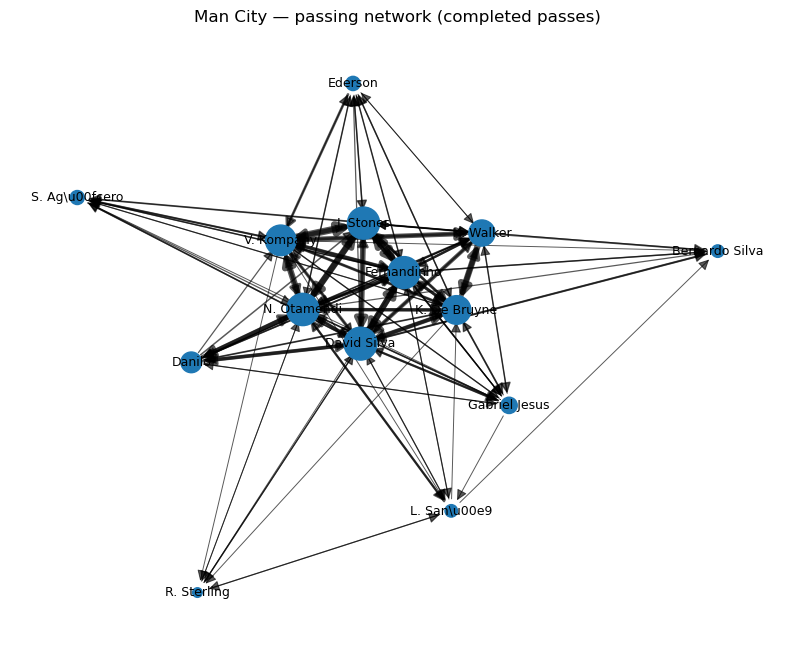

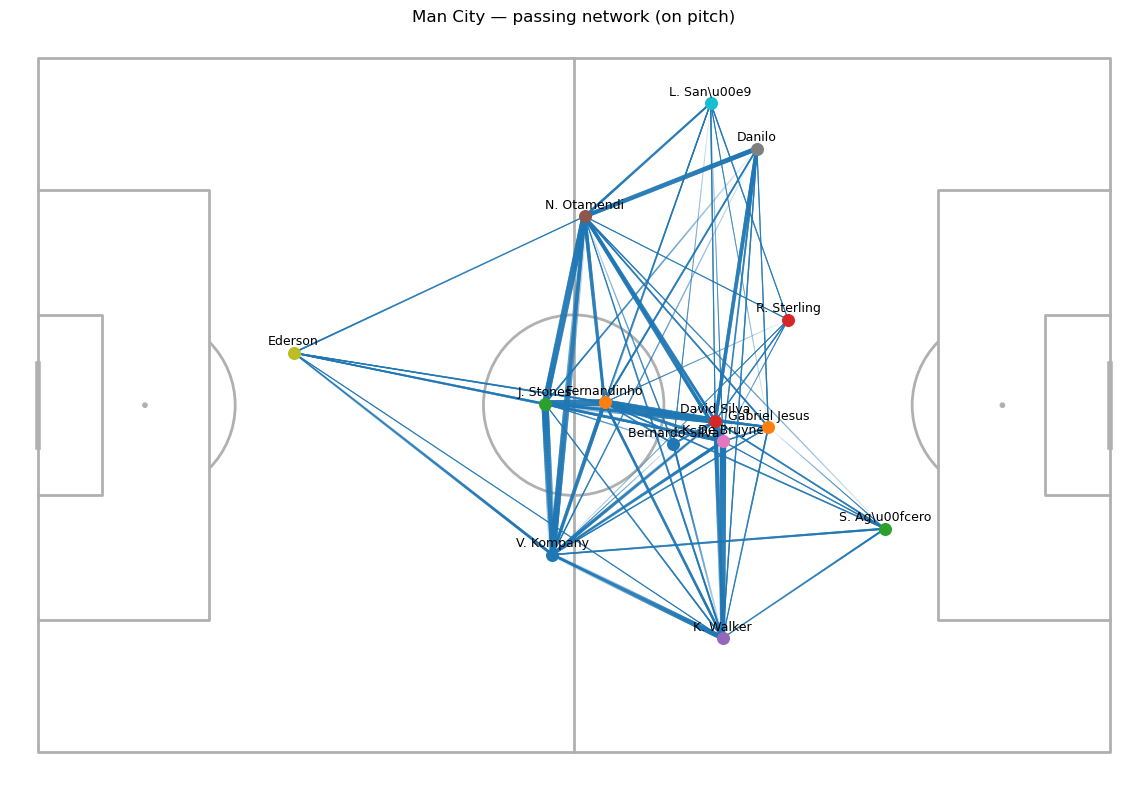

In [16]:
TEAM = 1625          # Manchester City
MATCH = 2499720      # one of the games you listed

# Graph layout
edges_graph = show_passing_network(
    MATCH, TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    df_players=df_players,     # optional for names
    completed_only=True,
    drop_self=True,
    mode="graph",
    title="Man City — passing network (completed passes)"
)

# On-pitch layout (needs `pip install mplsoccer`)
edges_pitch = show_passing_network(
    MATCH, TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    df_players=df_players,     # optional for names
    completed_only=True,
    drop_self=True,
    mode="pitch",
    title="Man City — passing network (on pitch)"
)


In [13]:
%pip



Usage:   
  c:\Users\tiago1951\anaconda3\envs\football_env\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes o

In [14]:
df_events_net.head(20)

,match_id,team_id,player_id,event_id,event_name,subevent_name,period,event_sec,x_start,y_start,x_end,y_end,is_completed,rel_player_id
0,2499719,1609,25413,177959171,Pass,Simple pass,1H,2.758649,49,49,31.0,78.0,True,<NA>
1,2499719,1609,370224,177959172,Pass,High pass,1H,4.946850,31,78,51.0,75.0,True,<NA>
2,2499719,1609,3319,177959173,Pass,Head pass,1H,6.542188,51,75,35.0,71.0,True,<NA>
3,2499719,1609,120339,177959174,Pass,Head pass,1H,8.143395,35,71,41.0,95.0,True,<NA>
4,2499719,1609,167145,177959175,Pass,Simple pass,1H,10.302366,41,95,72.0,88.0,True,<NA>
5,2499719,1609,3319,177959177,Pass,Simple pass,1H,12.548934,72,88,77.0,75.0,False,<NA>
6,2499719,1631,8653,177959186,Pass,Head pass,1H,13.961228,23,25,39.0,15.0,True,<NA>
7,2499719,1609,167145,177959178,Pass,Head pass,1H,15.320341,67,80,59.0,61.0,True,<NA>
8,2499719,1609,49876,177959179,Pass,Head pass,1H,18.051875,59,61,45.0,45.0,True,<NA>
9,2499719,1609,14869,177959180,Pass,High pass,1H,20.426527,45,45,71.0,54.0,True,<NA>
